<a href="https://colab.research.google.com/github/Rinzler122/Series-de-tiempo/blob/main/Visualizando_patrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

**ANALIZANDO PATRONES**

In [10]:
# Cargamos los datos
data = pd.read_csv('Ti_data.csv', index_col=0, parse_dates=True)
data.head()

,Ti
2018-10-01 18:00:00,19.600
2018-10-01 18:30:00,19.580
2018-10-01 19:00:00,19.610
2018-10-01 19:30:00,19.671
2018-10-01 20:00:00,19.749


Text(0.5, 1.0, 'Internal Temperature $(T_i)$')

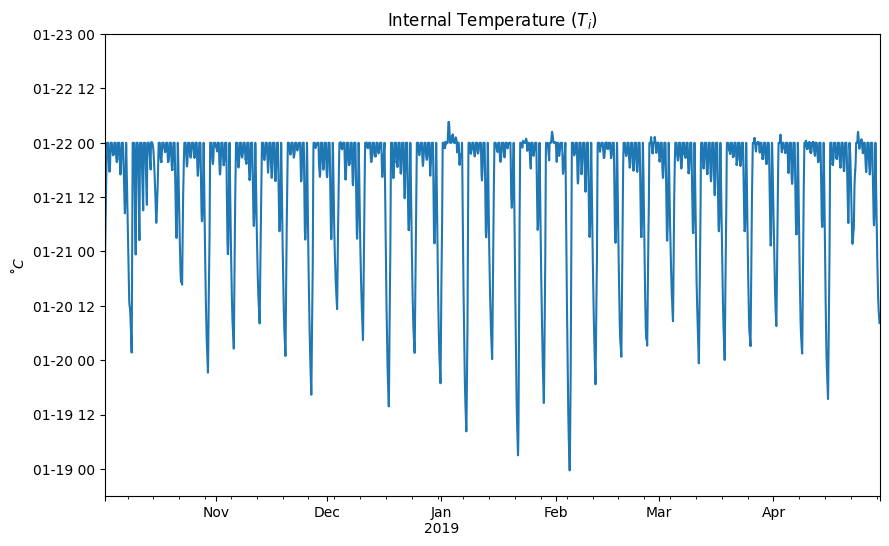

In [24]:
# Plot
fig, ax = plt.subplots(1,1, figsize=(10,6))
data.plot(ax = ax, color='C0', legend = None)

ax.set_ylim(17.75, 22)
ax.set_ylabel('$˚C$')
ax.set_title('Internal Temperature $(T_i)$')

*Visualizando patrones diurnos*

In [20]:
# Separa día y hora
data['date'] = data.index.normalize()
data['time'] = data.index.time.astype(str)
data.head()

,Ti,date,time
2018-10-01 18:00:00,19.600,2018-10-01,18:00:00
2018-10-01 18:30:00,19.580,2018-10-01,18:30:00
2018-10-01 19:00:00,19.610,2018-10-01,19:00:00
2018-10-01 19:30:00,19.671,2018-10-01,19:30:00
2018-10-01 20:00:00,19.749,2018-10-01,20:00:00


In [22]:
# Transformando el DataFrame
data_pivot = data.pivot(index ='date', columns ='time', values = 'Ti')
data_pivot

time,00:00:00,00:30:00,01:00:00,01:30:00,02:00:00,02:30:00,03:00:00,03:30:00,04:00:00,04:30:00,...,19:00:00,19:30:00,20:00:00,20:30:00,21:00:00,21:30:00,22:00:00,22:30:00,23:00:00,23:30:00
date,,,,,,,,,,,,,,,,,,,,,
2018-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.610,19.671,19.749,19.810,19.878,19.936,19.994,20.050,20.101,20.154
2018-10-02,20.201,20.251,20.298,20.345,20.393,20.437,20.485,20.528,20.574,20.616,...,20.933,20.909,20.892,20.872,20.854,20.839,20.819,20.809,20.790,20.783
2018-10-03,20.767,20.759,20.754,20.753,20.743,20.748,20.734,20.742,20.739,20.756,...,20.967,20.957,20.947,20.939,20.931,20.924,20.915,20.910,20.902,20.898
2018-10-04,20.892,20.888,20.887,20.885,20.885,20.886,20.886,20.890,20.889,20.897,...,20.958,20.944,20.927,20.915,20.897,20.886,20.869,20.860,20.847,20.840
2018-10-05,20.832,20.827,20.826,20.826,20.825,20.830,20.827,20.838,20.834,20.849,...,20.942,20.913,20.882,20.855,20.827,20.804,20.780,20.763,20.743,20.733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,20.989,20.982,20.965,20.957,20.943,20.938,20.926,20.924,20.913,20.915,...,20.946,20.927,20.907,20.889,20.869,20.852,20.835,20.818,20.808,20.791
2019-04-26,20.785,20.776,20.756,20.751,20.736,20.737,20.731,20.739,20.743,20.760,...,20.936,20.912,20.886,20.865,20.840,20.823,20.800,20.787,20.768,20.759
2019-04-27,20.744,20.741,20.724,20.726,20.712,20.719,20.709,20.722,20.719,20.739,...,20.931,20.896,20.858,20.819,20.778,20.736,20.694,20.653,20.611,20.570


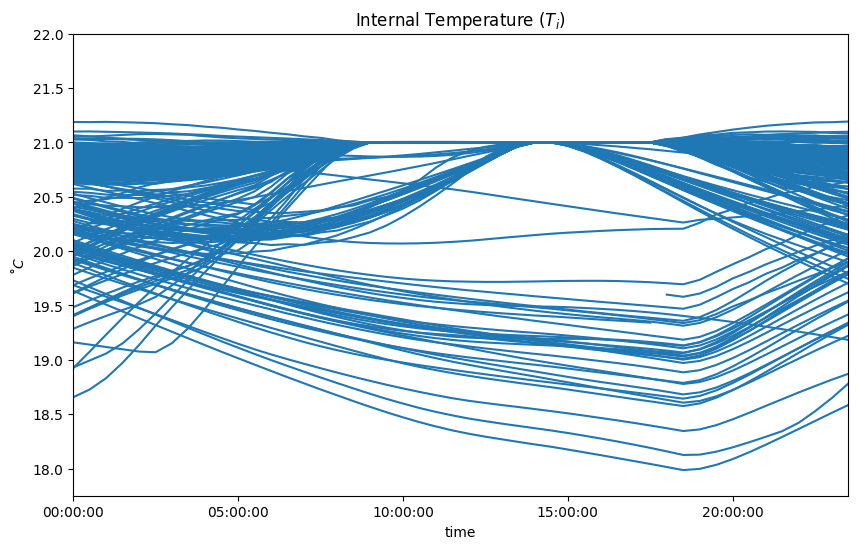

In [23]:
#Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
data_pivot.T.plot(ax=ax, color='C0', legend=False)
ax.set_xlim([0, 47])
ax.set_ylim(17.75, 22)
ax.set_ylabel('$˚C$')
ax.set_title('Internal Temperature $(T_i)$');

#**Transparencia: alpha**

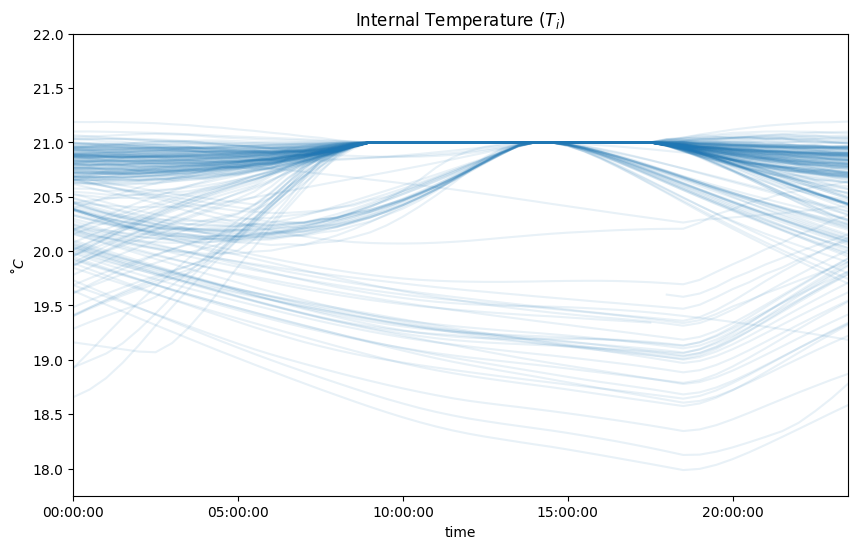

In [25]:
# Plot con transparencia
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

data_pivot.T.plot(ax=ax, color='C0', alpha=0.1, legend=False) #alpha: Nivel de transparencia
ax.set_xlim([0, 47])
ax.set_ylim(17.75, 22)
ax.set_ylabel('$˚C$')
ax.set_title('Internal Temperature $(T_i)$');

# Cambiamos el horario de comienzo

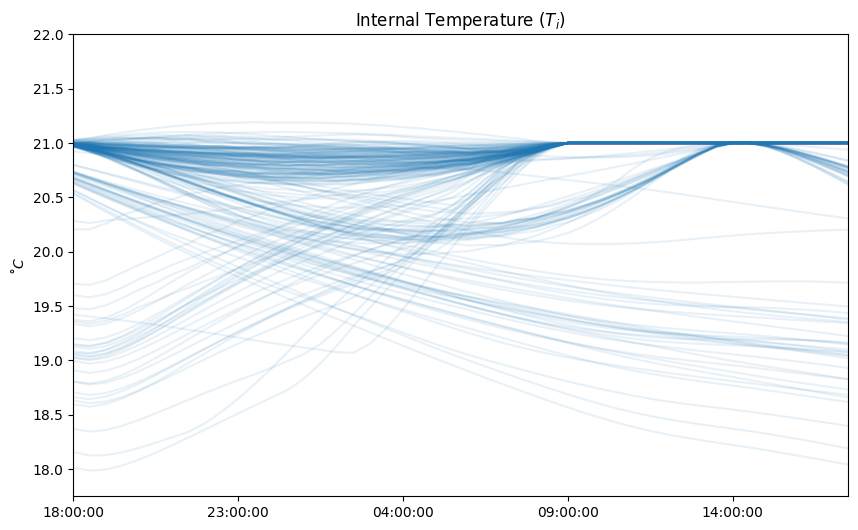

In [26]:
# Sabemos que empieza a las 18:00, queremos pasar de las 00 a las 18h:
# 18 horas son 36 medias horas.
df_roll = pd.DataFrame(index=data_pivot.index,
                       columns=np.roll(data_pivot.columns, -36),
                       data=np.roll(data_pivot.values, -36))

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
df_roll.T.plot(ax=ax, color='C0', alpha=0.1, legend=False)
ax.set_xlim([0, 47])
ax.set_ylim(17.75, 22)
ax.set_ylabel('$˚C$')
ax.set_title('Internal Temperature $(T_i)$')

# Visualizando patrones diurnos y semanales

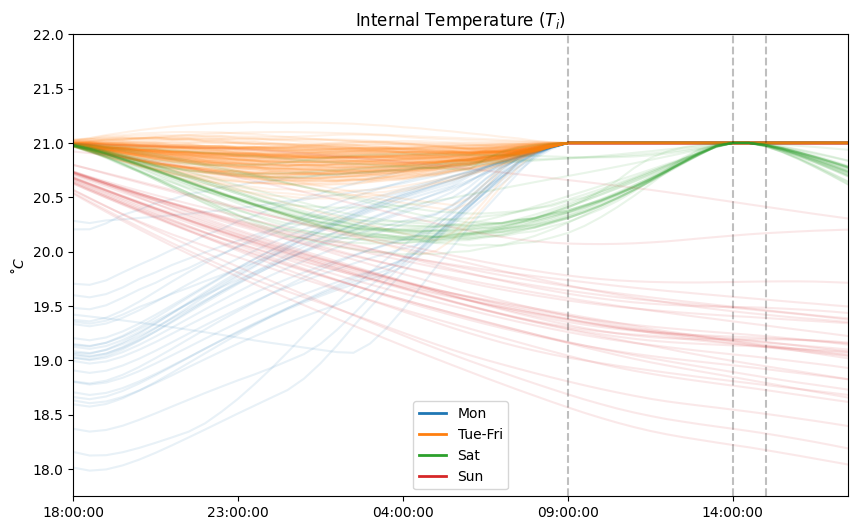

In [28]:
day_colors = { 'Monday': 'C0',
               'Tuesday': 'C1',
               'Wednesday': 'C1',
               'Thursday': 'C1',
               'Friday': 'C1',
               'Saturday': 'C2',
               'Sunday': 'C3'}

# Plot
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for day_name, color in day_colors.items():
    # NOTE: we are plotting the transposed DataFrame
    df_roll[df_roll.index.day_name() == day_name].T.plot(
        ax=ax, color=color, alpha=0.1, legend=None)

ax.set_xlim([0, 47])
ax.set_ylim(17.75, 22)

#Líneas verticales definiendo los horarios de calefacción
ax.axvline(30, alpha=0.25, color='black', linestyle='--')
ax.axvline(40, alpha=0.25, color='black', linestyle='--')
ax.axvline(42, alpha=0.25, color='black', linestyle='--')

ax.set_ylabel('$˚C$')
ax.set_title('Internal Temperature $(T_i)$');

# Leyenda:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='C0', lw=2),
                Line2D([0], [0], color='C1', lw=2),
                Line2D([0], [0], color='C2', lw=2),
                Line2D([0], [0], color='C3', lw=2)]

ax.legend(custom_lines, ['Mon', 'Tue-Fri', 'Sat', 'Sun']);